Sznajd Model
---
The Sznajd model proposes a simple Ising spin model to describe the decision making process in a closed community when there are 2 options to vote (A or B).

2 cases are developed in this code, one for a 1D representation of a community and another for a 2D one, the opinion evolution mechanism changes in each case, so they are going to be described separately.

### 1D

A chain of $N$ spins with periodic boundary conditions is defined randomly, at each time step, 2 spins $S_i$ and $S_{i+1}$ are selected, then:
*   If their opinion is the same ($S_iS_{i+1}=1$), $S_{i-1}$ and $S_{i+2}$ change their opinion to match the one of the pair
* If their opinion is different ($S_iS_{i+1}=-1$), $S_{i-1}$ takes the opinion of $S_{i+1}$ and $S_{i+2}$ takes the opinion of $S_i$

With this rule, 3 stable states are reached:
* All the members of the community vote for A
* All the members of the community vote for B
* $50\%$ vote for A and $50\%$ vote for B

### 2D

A square lattice of $N^2$ periodic boundary conditions is defined randomly, like in the 1d case, a spin $S_{i,j}$ is selected randomly, then, one of it's neighbors is selected randomly too, then, if their opinion is the same, they both change the opinions of the 6 spins that surround them.

In this case, only the consensus states can be reached.

Simulation
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import trange

In [15]:
################################################## 1-D ##################################################
def model1D(N,steps,seed):
    '''
    INPUT
    N : Number of agents
    steps : number of time steps
    seed : random seed
    '''
    start=time.time()
    path='./Simulation/1D'
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
    with open(path+'/log.txt', 'w') as file: ##Archivo que guardará los parámetros usados
        file.write( 'The system size is: '+str(N)+'\n')
        file.write('There were '+str(steps)+' timesteps'+'\n')
        file.write( 'The random seed used was: '+str(seed)+'\n')
    np.random.seed(seed)
    Ci=np.random.choice([0, 1],N)
    print(Ci)
    B=np.copy(Ci)
    M=np.zeros(steps)
    for i in trange(0,steps):
        M[i]=np.sum(B)
        if np.sum(B)/N == 1 or np.sum(B)/N == 0:
            break
        a1 = np.random.randint(N)
        a2 = (a1+1)%N
        a0=(a1-1)%N
        a3=(a2+1)%N
        if B[a1]*B[a2]==1:
            B[a0]=B[a1]
            B[a3]=B[a1]
        if B[a1]*B[a2]==0:
            B[a0]=B[a2]
            B[a3]=B[a1]
        else:
            pass
    M = M[:i+1]
    end=time.time()
    with open(path+'/log.txt', 'a') as file:
        file.write("This simulation took : "+str(end-start)+ " seconds")
    return Ci,B,M

In [13]:
########################################### 3-D, takes 2 agents ###########################################
def model2D(N,steps,seed):
    '''
    INPUT
    N : Number of agents
    steps : number of time steps
    seed : random seed
    '''
    start=time.time()
    path='./Simulation/2D'
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
    with open(path+'/log.txt', 'w') as file: ##Archivo que guardará los parámetros usados
        file.write( 'The system size is: '+str(N)+'\n')
        file.write('There were '+str(steps)+' timesteps'+'\n')
        file.write( 'The random seed used was: '+str(seed)+'\n')
    np.random.seed(seed)
    Ci=np.random.choice([0, 1],[N,N])
    B=np.copy(Ci)
    M=np.zeros(steps)
    for l in trange(0,steps):
        M[l]=np.sum(B)
        if np.sum(B)/N**2 == 1 or np.sum(B)/N**2 == 0:
            break
        i,j=np.random.randint(N),np.random.randint(N)
        a1 = B[i,j]
        i2 = np.random.choice([0,1,-1])
        if i2 == 0:
            j2=np.random.choice([-1,1])
        else:
            j2 = 0
        a2=B[(i+i2)%N, (j+j2)%N]
        if a1==a2:
            if j2==0 and i2==1:
                B[i,(j-1)%N]=B[(i-1)%N,j]=B[i,(j+1)%N]=B[i2,(j2-1)%N]=B[(i2+1)%N,j2]=B[i2,(j2+1)%N]=a1
            if j2==0 and i2==-1:
                B[i2,(j2-1)%N]=B[(i2-1)%N,j2]=B[i2,(j2+1)%N]=B[i,(j-1)%N]=B[(i+1)%N,j]=B[i,(j+1)%N]=a1
            if j2==1:
                B[i,(j-1)%N]=B[(i-1)%N,j]= B[(i+1)%N,j]=B[(i2-1)%N,j2]= B[(i2+1)%N,j2]= B[i2,(j2+1)%N]=a1
            if j2==-1:
                B[i2,(j2-1)%N]=B[(i2-1)%N,j2]=B[(i2+1)%N,j2]=B[(i-1)%N,j]=B[(i+1)%N,j]=B[i,(j+1)%N]=a1
        else:
            pass
    M = M[:l+1]
    end=time.time()
    with open(path+'/log.txt', 'a') as file:
        file.write("This simulation took : "+str(end-start)+ " seconds")
    return Ci,B,M

In [11]:
def plotter(model,N,steps,seed):
    '''
    INPUT
    model: choice between the 1D or 2D models
    N : Number of agents
    steps : number of time steps
    seed : random seed
    '''
    if model==model1D:
        path='./Simulation/1D'
        Ci,B,M=model1D(N,steps,seed)
        fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))   ##Crea la figura de resumen
        axes[0].imshow(np.expand_dims(Ci, axis=0), cmap='Greys',vmin=0, vmax=1)
        axes[0].set_title('Initial Configuration')
        axes[1].imshow(np.expand_dims(B, axis=0), cmap='Greys',vmin=0, vmax=1)
        axes[1].set_title('Final State') 
        axes[2].plot(M/N)
        axes[2].set_ylim(0,1.1)
        axes[2].set_xlabel("Step")
        axes[2].set_ylabel("Consensus")
        axes[2].set_title("consensus vs time")
        plt.savefig(path+'/Summary.png')
    if model==model2D:
        path='./Simulation/2D'
        Ci,B,M=model2D(N,steps,seed)
        fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))   ##Crea la figura de resumen
        axes[0].imshow(Ci, cmap='Greys', vmin=0, vmax=1)
        axes[0].set_title('Estado Inicial')
        axes[1].imshow(B, cmap='Greys', vmin=0, vmax=1)
        axes[1].set_title('Estado Final')  
        axes[2].plot(M/N**2)
        axes[2].set_ylim(0,1.1)
        axes[2].set_xlabel("Step")
        axes[2].set_ylabel("Consensus")
        axes[2].set_title("consensus vs time")
        plt.savefig(path+'/Summary.png')

100%|██████████| 100000/100000 [00:15<00:00, 6657.07it/s]


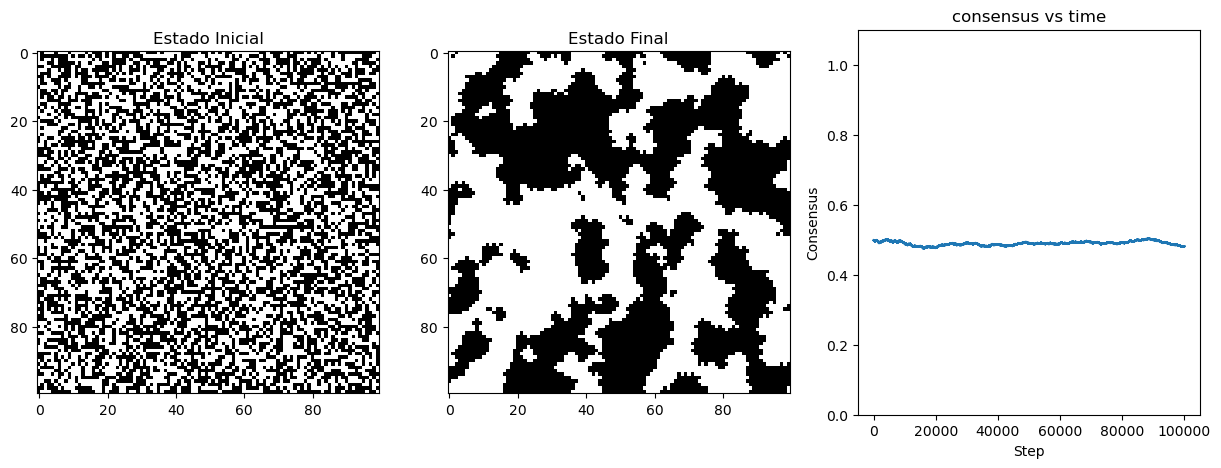

In [24]:
plotter(model2D,100,100000,42)